Phase Modulator Analysis Based on Electro-Optic Effect
COMPREHENSIVE PHASE MODULATOR ANALYSIS

Lithium Niobate Modulator:
----------------------------------------
PHASE MODULATOR PERFORMANCE ANALYSIS
Material: LiNbO3
Waveguide dimensions: 20.0 mm × 5.0 μm × 3.0 μm
Electrode gap: 10.0 μm
Wavelength: 1550.0 nm
Effective index: 2.140
EO coefficient (r): 30.8 pm/V
------------------------------------------------------------
Calculated V_π: 3.21 V
Modulation efficiency: 8.00 V·cm
3-dB bandwidth: 3.18 GHz
Propagation loss: 0.40 dB
Power consumption @ 1 GHz: 12.50 mW

Gallium Arsenide Modulator:
----------------------------------------
PHASE MODULATOR PERFORMANCE ANALYSIS
Material: GaAs
Waveguide dimensions: 5.0 mm × 5.0 μm × 3.0 μm
Electrode gap: 10.0 μm
Wavelength: 1550.0 nm
Effective index: 3.370
EO coefficient (r): 1.4 pm/V
------------------------------------------------------------
Calculated V_π: 70.80 V
Modulation efficiency: 1.25 V·cm
3-dB bandwidth: 3.18 GHz
Propagation loss: 0.25 d

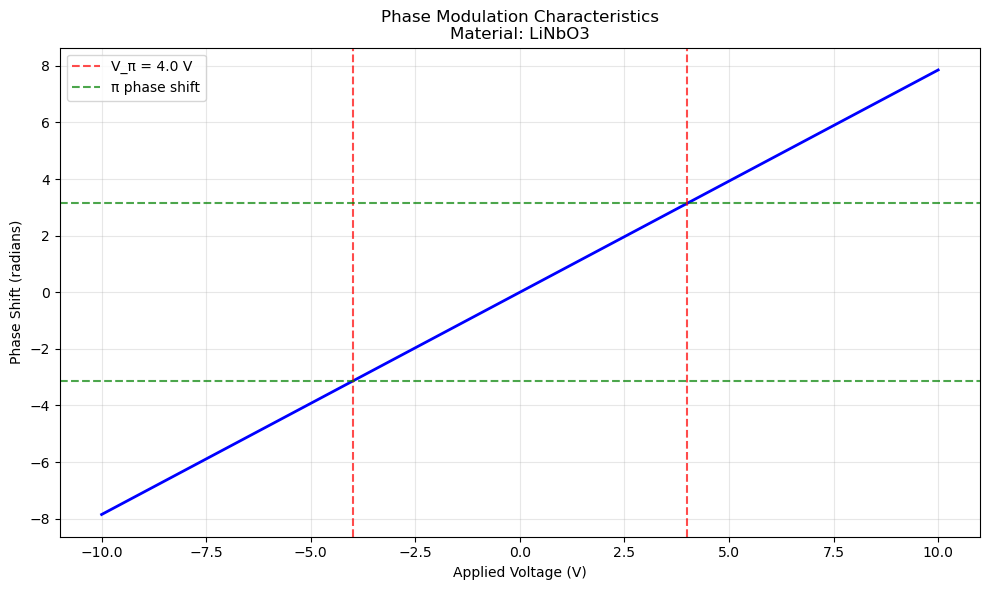

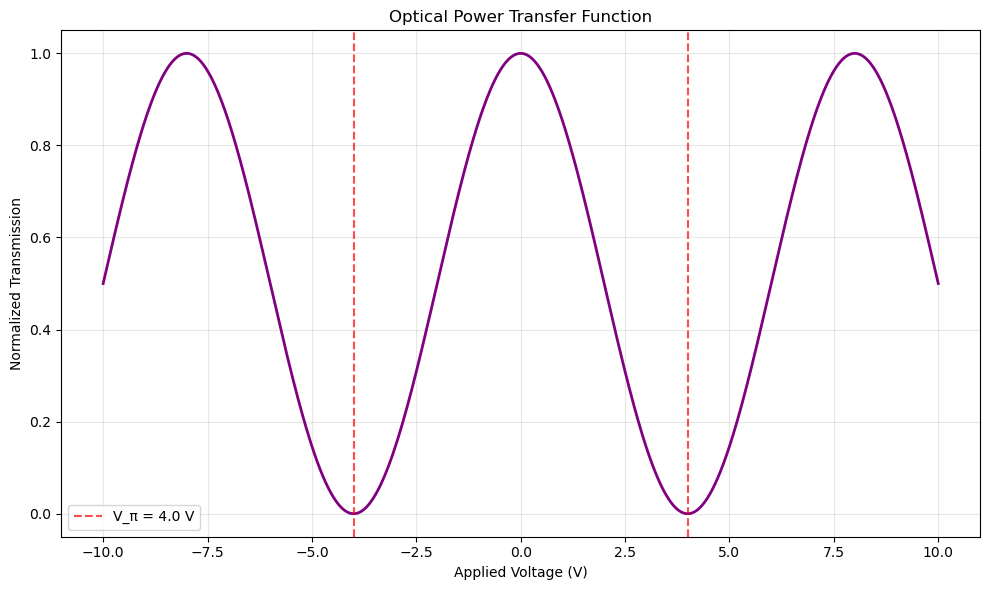

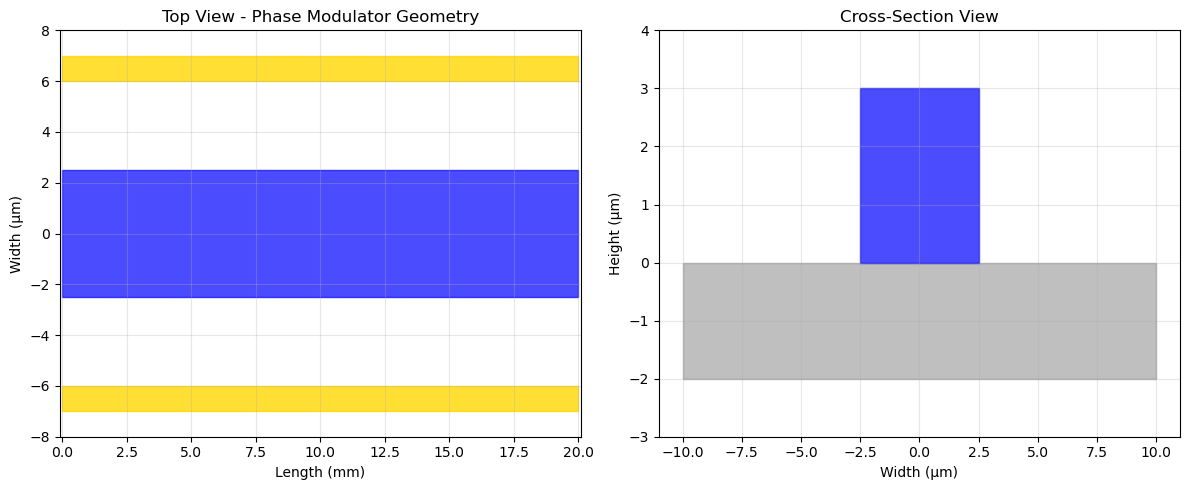

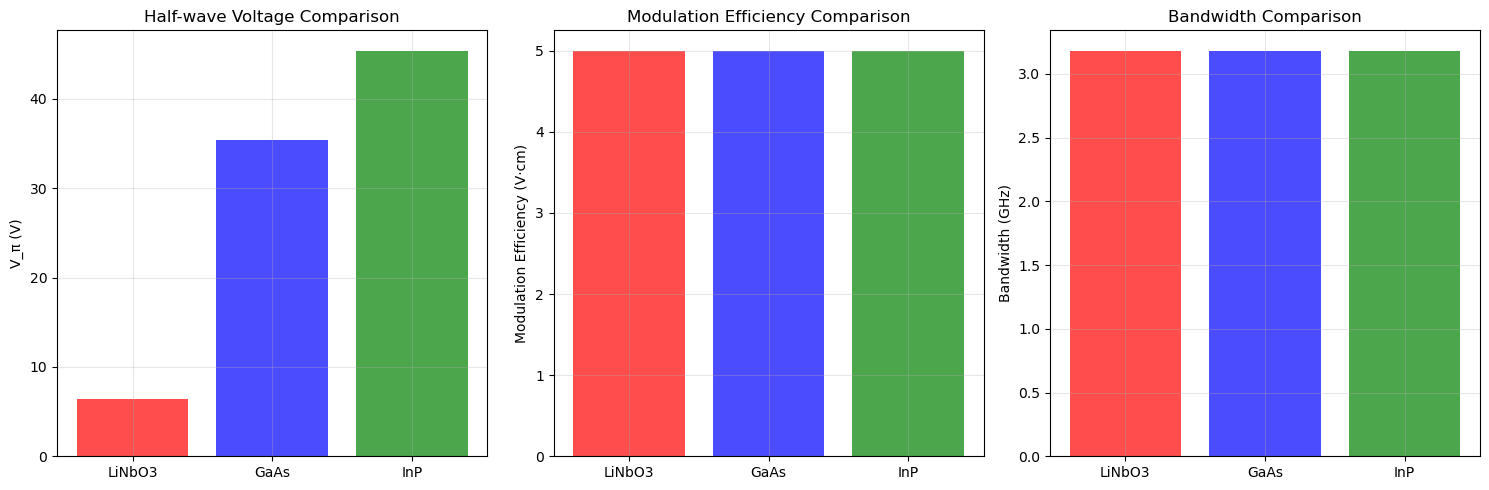

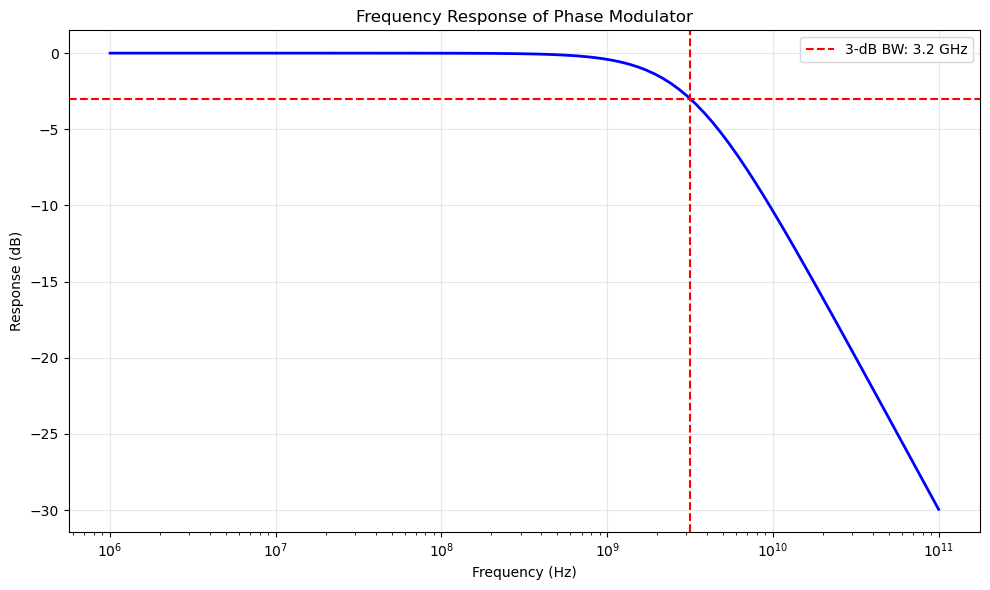

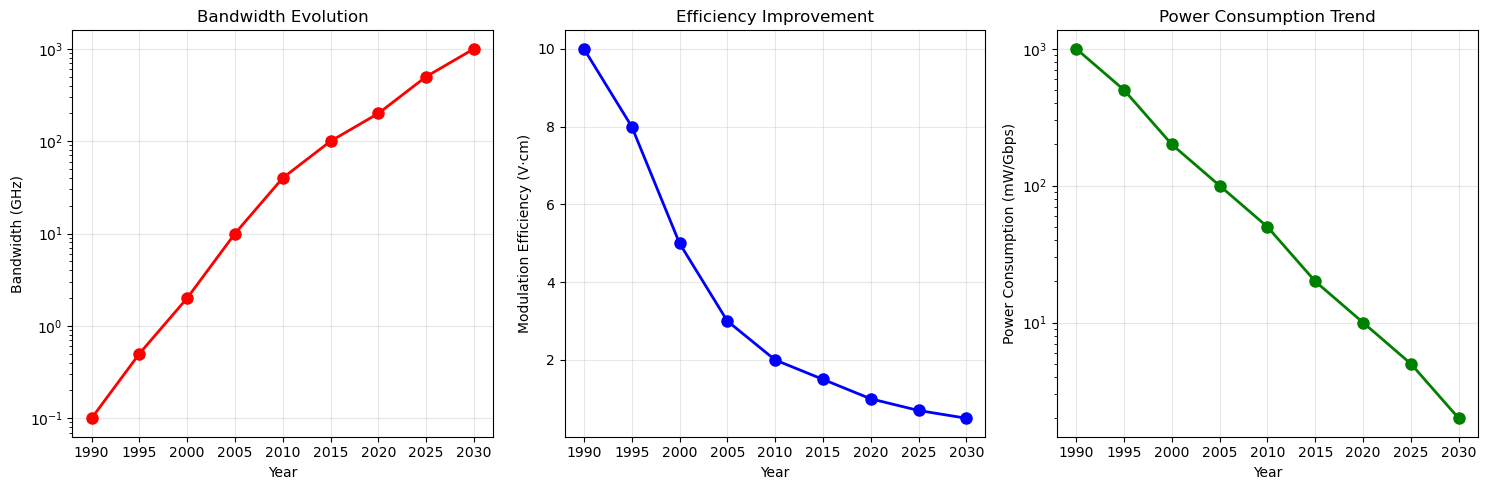


APPLICATIONS AND FUTURE TRENDS

Key Applications:
   1. Optical Communications: High-speed data transmission
   2. Quantum Computing: Qubit manipulation and control
   3. LiDAR Systems: Beam steering and phase array antennas
   4. Microwave Photonics: Signal processing and filtering
   5. Sensing Systems: Interferometric sensors and gyroscopes
   6. Optical Computing: Matrix multiplication and neural networks

Future Research Trends:
   1. Integration with silicon photonics for CMOS compatibility
   2. Development of new EO materials with higher coefficients
   3. Heterogeneous integration for improved performance
   4. Nonlinear EO effects for ultra-fast modulation
   5. Quantum-limited modulation for quantum applications
   6. Metamaterial-based modulators for compact designs

PERFORMANCE METRICS COMPARISON
Material        V_π (V)    Efficiency (V·cm)  Bandwidth (GHz) Loss (dB) 
------------------------------------------------------------
LiNbO3          3.21       8.00             

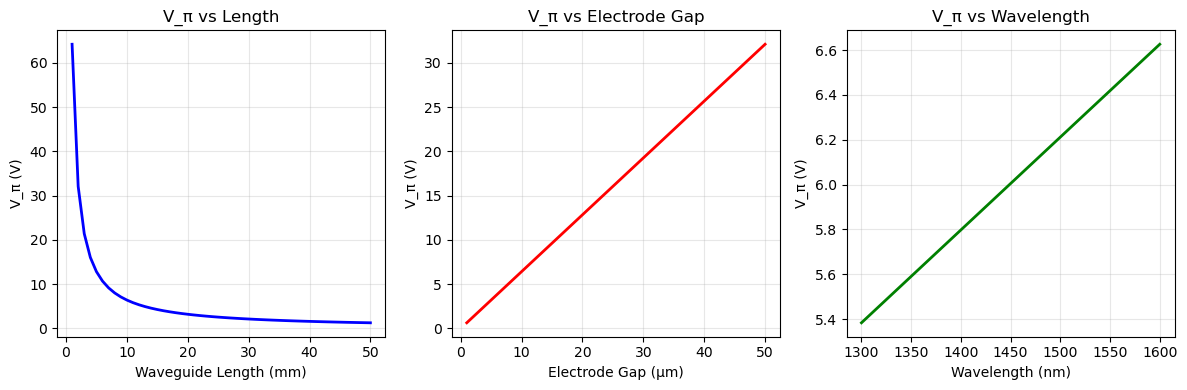


Analysis completed successfully!


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from mpl_toolkits.mplot3d import Axes3D
import scipy.constants as const

class PhaseModulator:
    """
    Phase Modulator based on Electro-Optic Effect in Waveguides
    """
    
    def __init__(self, material='LiNbO3', length=10e-3, width=5e-6, height=3e-6, 
                 electrode_gap=10e-6, V_pi=5.0, wavelength=1550e-9):
        """
        Initialize phase modulator parameters
        
        Parameters:
        material: Electro-optic material (LiNbO3, GaAs, InP, etc.)
        length: Waveguide length (m)
        width: Waveguide width (m)
        height: Waveguide height (m)
        electrode_gap: Gap between electrodes (m)
        V_pi: Voltage for π phase shift (V)
        wavelength: Operating wavelength (m)
        """
        self.material = material
        self.length = length
        self.width = width
        self.height = height
        self.electrode_gap = electrode_gap
        self.V_pi = V_pi
        self.wavelength = wavelength
        
        # Material properties database
        self.material_properties = {
            'LiNbO3': {
                'r33': 30.8e-12,  # Electro-optic coefficient (m/V)
                'n_eff': 2.14,    # Effective refractive index
                'epsilon_r': 28,  # Relative permittivity
                'loss': 0.2       # Propagation loss (dB/cm)
            },
            'GaAs': {
                'r41': 1.43e-12,
                'n_eff': 3.37,
                'epsilon_r': 13.1,
                'loss': 0.5
            },
            'InP': {
                'r41': 1.34e-12,
                'n_eff': 3.17,
                'epsilon_r': 12.4,
                'loss': 0.3
            }
        }
        
        self.set_material_properties()
    
    def set_material_properties(self):
        """Set material-specific properties"""
        if self.material in self.material_properties:
            props = self.material_properties[self.material]
            if self.material == 'LiNbO3':
                self.r_coeff = props['r33']  # Primary EO coefficient
            else:
                self.r_coeff = props['r41']
            self.n_eff = props['n_eff']
            self.epsilon_r = props['epsilon_r']
            self.loss = props['loss']
        else:
            # Default values for unknown materials
            self.r_coeff = 10e-12
            self.n_eff = 2.2
            self.epsilon_r = 10
            self.loss = 0.5
    
    def phase_shift(self, voltage):
        """
        Calculate phase shift for given voltage
        
        Parameters:
        voltage: Applied voltage (V)
        
        Returns:
        Phase shift in radians
        """
        return (np.pi * voltage) / self.V_pi
    
    def calculate_V_pi(self, gamma=0.8):
        """
        Calculate V_pi from physical parameters
        
        Parameters:
        gamma: Overlap factor between optical and electrical fields
        
        Returns:
        V_pi voltage (V)
        """
        # V_pi = (λ * d) / (n_eff^3 * r * Γ * L)
        V_pi_calc = (self.wavelength * self.electrode_gap) / \
                   (self.n_eff**3 * self.r_coeff * gamma * self.length)
        return V_pi_calc
    
    def modulation_efficiency(self):
        """
        Calculate modulation efficiency
        
        Returns:
        Efficiency in V·cm
        """
        return self.V_pi * self.length * 100  # V·cm
    
    def bandwidth(self, R_load=50, C_electrode=1e-12):
        """
        Calculate 3-dB electrical bandwidth
        
        Parameters:
        R_load: Load resistance (Ω)
        C_electrode: Electrode capacitance (F)
        
        Returns:
        Bandwidth in Hz
        """
        # f_3dB = 1 / (2π * R_load * C_electrode)
        return 1 / (2 * np.pi * R_load * C_electrode)
    
    def power_consumption(self, modulation_freq=1e9, V_pp=5.0):
        """
        Calculate power consumption
        
        Parameters:
        modulation_freq: Modulation frequency (Hz)
        V_pp: Peak-to-peak voltage (V)
        
        Returns:
        Power consumption in W
        """
        C_est = 1e-12  # Estimated capacitance
        return 0.5 * C_est * V_pp**2 * modulation_freq
    
    def propagation_loss(self):
        """
        Calculate total propagation loss
        
        Returns:
        Loss in dB
        """
        return self.loss * (self.length * 100)  # Convert m to cm
    
    def analyze_performance(self, voltage_range=np.linspace(-10, 10, 100)):
        """
        Comprehensive performance analysis
        
        Parameters:
        voltage_range: Voltage range for analysis
        """
        print("="*60)
        print("PHASE MODULATOR PERFORMANCE ANALYSIS")
        print("="*60)
        print(f"Material: {self.material}")
        print(f"Waveguide dimensions: {self.length*1e3:.1f} mm × {self.width*1e6:.1f} μm × {self.height*1e6:.1f} μm")
        print(f"Electrode gap: {self.electrode_gap*1e6:.1f} μm")
        print(f"Wavelength: {self.wavelength*1e9:.1f} nm")
        print(f"Effective index: {self.n_eff:.3f}")
        print(f"EO coefficient (r): {self.r_coeff*1e12:.1f} pm/V")
        print("-"*60)
        
        V_pi_calc = self.calculate_V_pi()
        print(f"Calculated V_π: {V_pi_calc:.2f} V")
        print(f"Modulation efficiency: {self.modulation_efficiency():.2f} V·cm")
        print(f"3-dB bandwidth: {self.bandwidth()/1e9:.2f} GHz")
        print(f"Propagation loss: {self.propagation_loss():.2f} dB")
        print(f"Power consumption @ 1 GHz: {self.power_consumption()*1e3:.2f} mW")

# Plotting functions
def plot_phase_modulation(modulator, voltage_range=np.linspace(-10, 10, 1000)):
    """Plot phase shift vs voltage"""
    phase_shift = modulator.phase_shift(voltage_range)
    
    plt.figure(figsize=(10, 6))
    plt.plot(voltage_range, phase_shift, 'b-', linewidth=2)
    plt.axvline(x=modulator.V_pi, color='r', linestyle='--', alpha=0.7, label=f'V_π = {modulator.V_pi} V')
    plt.axvline(x=-modulator.V_pi, color='r', linestyle='--', alpha=0.7)
    plt.axhline(y=np.pi, color='g', linestyle='--', alpha=0.7, label='π phase shift')
    plt.axhline(y=-np.pi, color='g', linestyle='--', alpha=0.7)
    
    plt.xlabel('Applied Voltage (V)')
    plt.ylabel('Phase Shift (radians)')
    plt.title(f'Phase Modulation Characteristics\nMaterial: {modulator.material}')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

def plot_transfer_function(modulator, voltage_range=np.linspace(-10, 10, 1000)):
    """Plot optical power transfer function"""
    phase_shift = modulator.phase_shift(voltage_range)
    transmission = np.cos(phase_shift/2)**2  # For interferometric configuration
    
    plt.figure(figsize=(10, 6))
    plt.plot(voltage_range, transmission, 'purple', linewidth=2)
    plt.axvline(x=modulator.V_pi, color='r', linestyle='--', alpha=0.7, label=f'V_π = {modulator.V_pi} V')
    plt.axvline(x=-modulator.V_pi, color='r', linestyle='--', alpha=0.7)
    
    plt.xlabel('Applied Voltage (V)')
    plt.ylabel('Normalized Transmission')
    plt.title('Optical Power Transfer Function')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

def plot_modulator_geometry(modulator):
    """Plot 2D cross-section of phase modulator"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Top view
    waveguide = Rectangle((0, -modulator.width/2*1e6), modulator.length*1e3, 
                         modulator.width*1e6, fill=True, color='blue', alpha=0.7)
    electrode1 = Rectangle((0, -modulator.electrode_gap/2*1e6 - 2), modulator.length*1e3, 
                          1, fill=True, color='gold', alpha=0.8)
    electrode2 = Rectangle((0, modulator.electrode_gap/2*1e6 + 1), modulator.length*1e3, 
                          1, fill=True, color='gold', alpha=0.8)
    
    ax1.add_patch(waveguide)
    ax1.add_patch(electrode1)
    ax1.add_patch(electrode2)
    
    ax1.set_xlim(-0.1, modulator.length*1e3 + 0.1)
    ax1.set_ylim(-modulator.electrode_gap/2*1e6 - 3, modulator.electrode_gap/2*1e6 + 3)
    ax1.set_xlabel('Length (mm)')
    ax1.set_ylabel('Width (μm)')
    ax1.set_title('Top View - Phase Modulator Geometry')
    ax1.grid(True, alpha=0.3)
    ax1.set_aspect('auto')
    
    # Cross-section view
    waveguide_cs = Rectangle((-modulator.width/2*1e6, 0), modulator.width*1e6, 
                            modulator.height*1e6, fill=True, color='blue', alpha=0.7)
    substrate = Rectangle((-modulator.electrode_gap/2*1e6 - 5, -2), 
                         modulator.electrode_gap*1e6 + 10, 2, fill=True, color='gray', alpha=0.5)
    
    ax2.add_patch(substrate)
    ax2.add_patch(waveguide_cs)
    
    ax2.set_xlim(-modulator.electrode_gap/2*1e6 - 6, modulator.electrode_gap/2*1e6 + 6)
    ax2.set_ylim(-3, modulator.height*1e6 + 1)
    ax2.set_xlabel('Width (μm)')
    ax2.set_ylabel('Height (μm)')
    ax2.set_title('Cross-Section View')
    ax2.grid(True, alpha=0.3)
    ax2.set_aspect('auto')
    
    plt.tight_layout()
    plt.show()

def plot_material_comparison():
    """Compare performance of different EO materials"""
    materials = ['LiNbO3', 'GaAs', 'InP']
    V_pi_values = []
    efficiency_values = []
    bandwidth_values = []
    
    for material in materials:
        mod = PhaseModulator(material=material, length=10e-3)
        V_pi_values.append(mod.calculate_V_pi())
        efficiency_values.append(mod.modulation_efficiency())
        bandwidth_values.append(mod.bandwidth()/1e9)
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    
    # V_pi comparison
    bars1 = ax1.bar(materials, V_pi_values, color=['red', 'blue', 'green'], alpha=0.7)
    ax1.set_ylabel('V_π (V)')
    ax1.set_title('Half-wave Voltage Comparison')
    ax1.grid(True, alpha=0.3)
    
    # Efficiency comparison
    bars2 = ax2.bar(materials, efficiency_values, color=['red', 'blue', 'green'], alpha=0.7)
    ax2.set_ylabel('Modulation Efficiency (V·cm)')
    ax2.set_title('Modulation Efficiency Comparison')
    ax2.grid(True, alpha=0.3)
    
    # Bandwidth comparison
    bars3 = ax3.bar(materials, bandwidth_values, color=['red', 'blue', 'green'], alpha=0.7)
    ax3.set_ylabel('Bandwidth (GHz)')
    ax3.set_title('Bandwidth Comparison')
    ax3.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def plot_frequency_response(modulator, freq_range=np.logspace(6, 11, 100)):
    """Plot frequency response of modulator"""
    response = 1 / np.sqrt(1 + (freq_range / modulator.bandwidth())**2)
    
    plt.figure(figsize=(10, 6))
    plt.semilogx(freq_range, 20*np.log10(response), 'b-', linewidth=2)
    plt.axvline(x=modulator.bandwidth(), color='r', linestyle='--', 
                label=f'3-dB BW: {modulator.bandwidth()/1e9:.1f} GHz')
    plt.axhline(y=-3, color='r', linestyle='--')
    
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Response (dB)')
    plt.title('Frequency Response of Phase Modulator')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

def plot_research_trends():
    """Plot historical and projected research trends"""
    years = np.array([1990, 1995, 2000, 2005, 2010, 2015, 2020, 2025, 2030])
    
    # Trend data (hypothetical)
    bandwidth_trend = np.array([0.1, 0.5, 2, 10, 40, 100, 200, 500, 1000])  # GHz
    efficiency_trend = np.array([10, 8, 5, 3, 2, 1.5, 1.0, 0.7, 0.5])  # V·cm
    power_trend = np.array([1000, 500, 200, 100, 50, 20, 10, 5, 2])  # mW/Gbps
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    
    ax1.plot(years, bandwidth_trend, 'ro-', linewidth=2, markersize=8)
    ax1.set_yscale('log')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Bandwidth (GHz)')
    ax1.set_title('Bandwidth Evolution')
    ax1.grid(True, alpha=0.3)
    
    ax2.plot(years, efficiency_trend, 'bo-', linewidth=2, markersize=8)
    ax2.set_xlabel('Year')
    ax2.set_ylabel('Modulation Efficiency (V·cm)')
    ax2.set_title('Efficiency Improvement')
    ax2.grid(True, alpha=0.3)
    
    ax3.plot(years, power_trend, 'go-', linewidth=2, markersize=8)
    ax3.set_yscale('log')
    ax3.set_xlabel('Year')
    ax3.set_ylabel('Power Consumption (mW/Gbps)')
    ax3.set_title('Power Consumption Trend')
    ax3.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Main analysis function
def comprehensive_analysis():
    """Perform comprehensive analysis of phase modulators"""
    
    # Create modulator instances for different materials
    mod_ln = PhaseModulator(material='LiNbO3', length=20e-3, V_pi=4.0)
    mod_gaas = PhaseModulator(material='GaAs', length=5e-3, V_pi=2.5)
    mod_inp = PhaseModulator(material='InP', length=10e-3, V_pi=3.0)
    
    print("COMPREHENSIVE PHASE MODULATOR ANALYSIS")
    print("="*60)
    
    # Analyze each modulator
    for i, (name, modulator) in enumerate([('Lithium Niobate', mod_ln), 
                                         ('Gallium Arsenide', mod_gaas),
                                         ('Indium Phosphide', mod_inp)]):
        print(f"\n{name} Modulator:")
        print("-"*40)
        modulator.analyze_performance()
    
    # Generate all plots
    voltage_range = np.linspace(-10, 10, 1000)
    
    # Basic characteristics
    plot_phase_modulation(mod_ln, voltage_range)
    plot_transfer_function(mod_ln, voltage_range)
    plot_modulator_geometry(mod_ln)
    
    # Comparative analysis
    plot_material_comparison()
    plot_frequency_response(mod_ln)
    plot_research_trends()
    
    # Applications and future trends
    print("\n" + "="*60)
    print("APPLICATIONS AND FUTURE TRENDS")
    print("="*60)
    
    applications = [
        "1. Optical Communications: High-speed data transmission",
        "2. Quantum Computing: Qubit manipulation and control",
        "3. LiDAR Systems: Beam steering and phase array antennas",
        "4. Microwave Photonics: Signal processing and filtering",
        "5. Sensing Systems: Interferometric sensors and gyroscopes",
        "6. Optical Computing: Matrix multiplication and neural networks"
    ]
    
    print("\nKey Applications:")
    for app in applications:
        print(f"   {app}")
    
    trends = [
        "1. Integration with silicon photonics for CMOS compatibility",
        "2. Development of new EO materials with higher coefficients",
        "3. Heterogeneous integration for improved performance",
        "4. Nonlinear EO effects for ultra-fast modulation",
        "5. Quantum-limited modulation for quantum applications",
        "6. Metamaterial-based modulators for compact designs"
    ]
    
    print("\nFuture Research Trends:")
    for trend in trends:
        print(f"   {trend}")
    
    # Performance metrics table
    print("\n" + "="*60)
    print("PERFORMANCE METRICS COMPARISON")
    print("="*60)
    print(f"{'Material':<15} {'V_π (V)':<10} {'Efficiency (V·cm)':<18} {'Bandwidth (GHz)':<15} {'Loss (dB)':<10}")
    print("-"*60)
    
    materials = [mod_ln, mod_gaas, mod_inp]
    names = ['LiNbO3', 'GaAs', 'InP']
    
    for name, mod in zip(names, materials):
        print(f"{name:<15} {mod.calculate_V_pi():<10.2f} {mod.modulation_efficiency():<18.2f} "
              f"{mod.bandwidth()/1e9:<15.2f} {mod.propagation_loss():<10.2f}")

# Parameter ranges for optimization studies
def parameter_sweep_analysis():
    """Analyze performance vs key parameters"""
    
    # Length sweep
    lengths = np.linspace(1e-3, 50e-3, 50)
    V_pi_length = []
    
    for L in lengths:
        mod = PhaseModulator(length=L)
        V_pi_length.append(mod.calculate_V_pi())
    
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 3, 1)
    plt.plot(lengths*1e3, V_pi_length, 'b-', linewidth=2)
    plt.xlabel('Waveguide Length (mm)')
    plt.ylabel('V_π (V)')
    plt.title('V_π vs Length')
    plt.grid(True, alpha=0.3)
    
    # Electrode gap sweep
    gaps = np.linspace(1e-6, 50e-6, 50)
    V_pi_gap = []
    
    for gap in gaps:
        mod = PhaseModulator(electrode_gap=gap)
        V_pi_gap.append(mod.calculate_V_pi())
    
    plt.subplot(1, 3, 2)
    plt.plot(gaps*1e6, V_pi_gap, 'r-', linewidth=2)
    plt.xlabel('Electrode Gap (μm)')
    plt.ylabel('V_π (V)')
    plt.title('V_π vs Electrode Gap')
    plt.grid(True, alpha=0.3)
    
    # Wavelength sweep
    wavelengths = np.linspace(1300e-9, 1600e-9, 50)
    V_pi_wavelength = []
    
    for wl in wavelengths:
        mod = PhaseModulator(wavelength=wl)
        V_pi_wavelength.append(mod.calculate_V_pi())
    
    plt.subplot(1, 3, 3)
    plt.plot(wavelengths*1e9, V_pi_wavelength, 'g-', linewidth=2)
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('V_π (V)')
    plt.title('V_π vs Wavelength')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Run comprehensive analysis
if __name__ == "__main__":
    # Set matplotlib style
    plt.style.use('default')
    
    print("Phase Modulator Analysis Based on Electro-Optic Effect")
    print("="*60)
    
    # Perform comprehensive analysis
    comprehensive_analysis()
    
    # Additional parameter sweep analysis
    print("\n" + "="*60)
    print("PARAMETER SWEEP ANALYSIS")
    print("="*60)
    parameter_sweep_analysis()
    
    print("\nAnalysis completed successfully!")
    